## RiverCast

### Import Libraries and Dataset

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
# import dataset
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df.head(10)

,Station,Year,Month,Day,Hour,Waterlevel,Station.1,Year.1,Month.1,Day.1,...,RF-Intensity.1,Humidity,Precipitation,Temperature,Temperature.1,Humidity.1,Precipitation.1,Temperature.2,Humidity.2,Precipitation.2
0,NANGKA,2012,January,1,1,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
1,NANGKA,2012,January,1,2,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
2,NANGKA,2012,January,1,3,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
3,NANGKA,2012,January,1,4,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
4,NANGKA,2012,January,1,5,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
5,NANGKA,2012,January,1,6,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
6,NANGKA,2012,January,1,7,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
7,NANGKA,2012,January,1,8,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
8,NANGKA,2012,January,1,9,15.86,STO.NINO,2012,January,1,...,0.0,17.64,0.01,26.20,26.20,17.64,0.01,26.20,17.64,0.01
9,NANGKA,2012,January,1,10,15.86,STO.NINO,2012,January,1,...,0.0,17.27,0.02,27.55,27.55,17.27,0.02,27.55,17.27,0.02


In [3]:
# remove non numeric fields
df = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3', 'RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
df = df.astype(np.float64)
df.head(10)

,Waterlevel,Waterlevel.1,Waterlevel.2,Waterlevel.3,RF-Intensity,RF-Intensity.1,Temperature,Temperature.1,Temperature.2,Humidity,Humidity.1,Humidity.2,Precipitation,Precipitation.1,Precipitation.2
0,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
1,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
2,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
3,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
4,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
5,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
6,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
7,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
8,15.86,12.53,12.53,21.97,0.0,0.0,26.20,26.20,26.20,17.64,17.64,17.64,0.01,0.01,0.01
9,15.86,12.53,12.53,21.97,0.0,0.0,27.55,27.55,27.55,17.27,17.27,17.27,0.02,0.02,0.02


### Clean Dataset

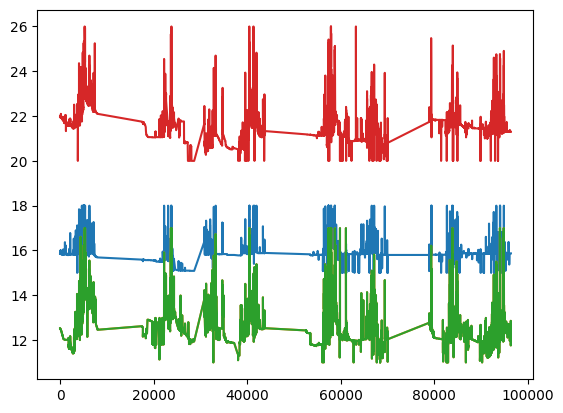

In [4]:
# remove water data outliers
df['Waterlevel'] = df['Waterlevel'].clip(upper=18, lower=15, axis=0)
df['Waterlevel.1'] = df['Waterlevel.1'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.2'] = df['Waterlevel.2'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.3'] = df['Waterlevel.3'].clip(upper=26, lower=20, axis=0)

water_data = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']]
plt.plot(water_data)

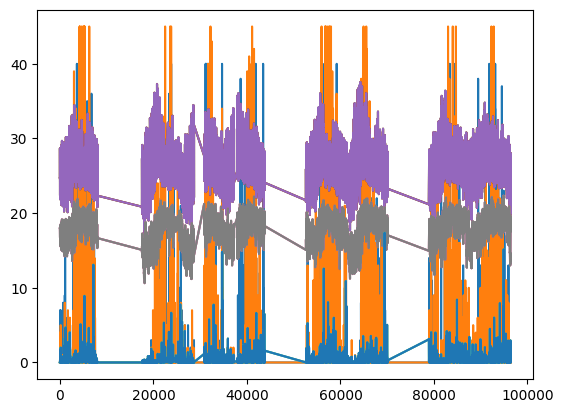

In [5]:
# remove weather data outliers
df['RF-Intensity'] = df['RF-Intensity'].clip(upper=40, lower=0, axis=0)
df['RF-Intensity.1'] = df['RF-Intensity.1'].clip(upper=45, lower=0, axis=0)
df[['Precipitation', 'Precipitation.1', 'Precipitation.2']] = df[['Precipitation', 'Precipitation.1', 'Precipitation.2']].clip(upper=20, lower=0, axis=0)

weather_data = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
plt.plot(weather_data)

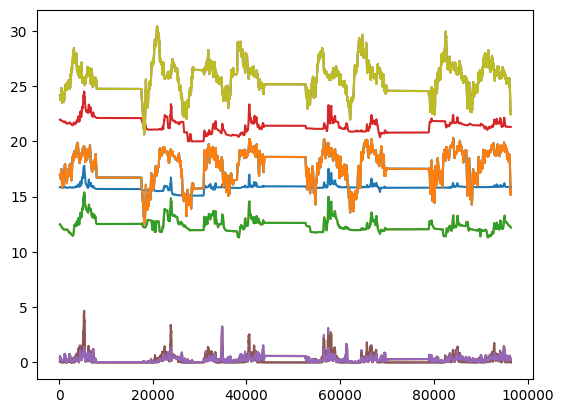

In [6]:
# smoothen time-series using moving average
df = df.rolling(window=168).mean()
df.dropna(inplace=True)
plt.plot(df)

### Principal Component Analysis

In [7]:
# standardize the data
scaled_data = (df - df.mean()) / df.std()
scaled_data.head(10)

,Waterlevel,Waterlevel.1,Waterlevel.2,Waterlevel.3,RF-Intensity,RF-Intensity.1,Temperature,Temperature.1,Temperature.2,Humidity,Humidity.1,Humidity.2,Precipitation,Precipitation.1,Precipitation.2
167,0.029692,0.098058,0.098058,0.915519,-0.549673,-0.475817,-1.142507,-1.142507,-1.142507,-0.566178,-0.566178,-0.566178,0.359213,0.359213,0.359213
168,0.029493,0.097394,0.097394,0.915220,-0.549673,-0.475817,-1.150566,-1.150566,-1.150566,-0.570444,-0.570444,-0.570444,0.367571,0.367571,0.367571
169,0.029097,0.096730,0.096730,0.914921,-0.549673,-0.475817,-1.158869,-1.158869,-1.158869,-0.574709,-0.574709,-0.574709,0.378286,0.378286,0.378286
170,0.028700,0.096066,0.096066,0.914623,-0.549673,-0.475817,-1.167294,-1.167294,-1.167294,-0.578975,-0.578975,-0.578975,0.390073,0.390073,0.390073
171,0.028303,0.095402,0.095402,0.914324,-0.549673,-0.475817,-1.175597,-1.175597,-1.175597,-0.583240,-0.583240,-0.583240,0.405931,0.405931,0.405931
172,0.027907,0.094738,0.094738,0.914026,-0.549673,-0.475817,-1.183574,-1.183574,-1.183574,-0.587273,-0.587273,-0.587273,0.426719,0.426719,0.426719
173,0.027510,0.094074,0.094074,0.913727,-0.549673,-0.475817,-1.190982,-1.190982,-1.190982,-0.590840,-0.590840,-0.590840,0.452435,0.452435,0.452435
174,0.027114,0.093410,0.093410,0.913428,-0.549673,-0.475817,-1.196029,-1.196029,-1.196029,-0.592740,-0.592740,-0.592740,0.485866,0.485866,0.485866
175,0.026717,0.092746,0.092746,0.913130,-0.549673,-0.475817,-1.199081,-1.199081,-1.199081,-0.593244,-0.593244,-0.593244,0.520798,0.520798,0.520798
176,0.026320,0.091987,0.091987,0.912831,-0.549673,-0.475817,-1.206245,-1.206245,-1.206245,-0.591344,-0.591344,-0.591344,0.560015,0.560015,0.560015


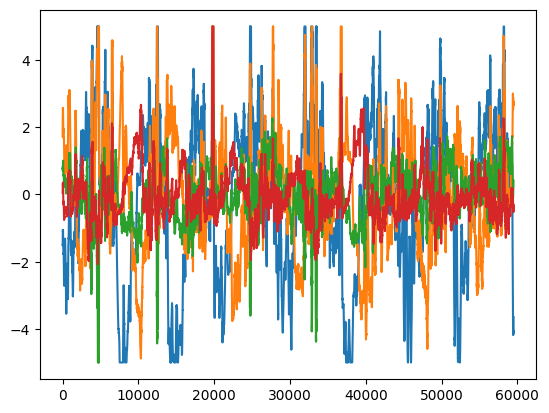

In [8]:
# reduce weather data

# convert to weather data to numpy
weather_data = scaled_data[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1', 'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']].to_numpy()

# compute covariance matrix
weather_cov_matrix = np.cov(weather_data, ddof=0, rowvar=False)

# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(weather_cov_matrix)
order_of_importance = np.argsort(eigenvalues)[::-1] 

# sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance].real
sorted_eigenvectors = eigenvectors[:,order_of_importance].real

k = 4  # number of features to preserve
reduced_weather_data = np.matmul(weather_data, sorted_eigenvectors[:,:k]) # transform the original data
reduced_weather_data = np.clip(reduced_weather_data, -5.0, 5.0)
plt.plot(reduced_weather_data)

### Normalize Dataset

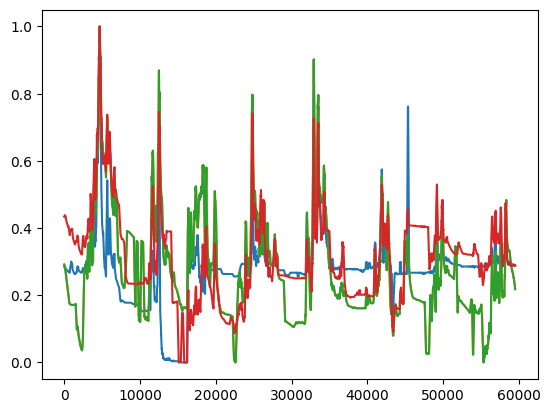

In [9]:
# normalize water data
water_scaler = MinMaxScaler()
water_data = scaled_data[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']]
water_data = water_scaler.fit_transform(water_data)
plt.plot(water_data)

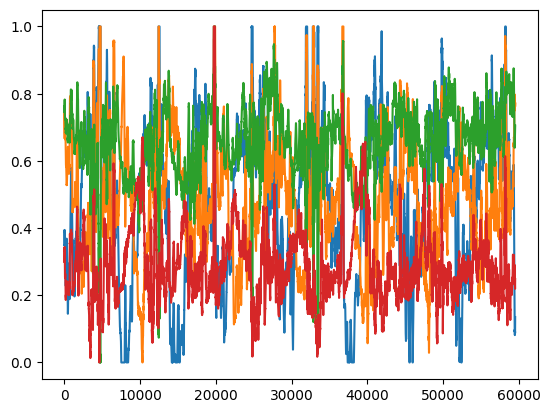

In [10]:
# normalize weather data
weather_scaler = MinMaxScaler()
weather_data = weather_scaler.fit_transform(reduced_weather_data)
plt.plot(weather_data)

### Prepare Training Batches

In [11]:
# utilize rolling window to generate dataset
MAX_TOKENS = 720
window_size = MAX_TOKENS + 1
window_step = 48
series_len = len(weather_data) - window_size

weather_windows = np.array([weather_data[i:(i + window_size)] for i in range(0, series_len, window_step)])
print(weather_windows.shape)

water_windows = np.array([water_data[i:(i + window_size)] for i in range(0, series_len, window_step)])
print(water_windows.shape)

(1225, 721, 4)
(1225, 721, 4)


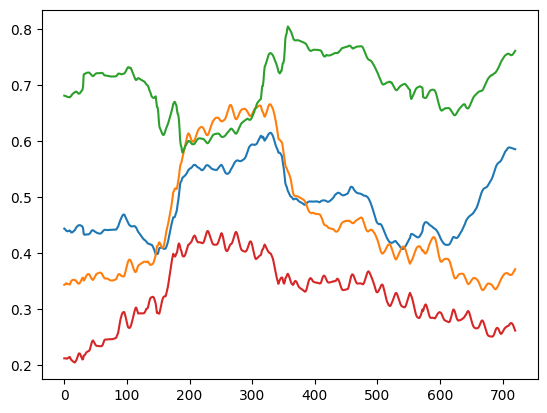

In [12]:
plt.plot(weather_windows[1120])

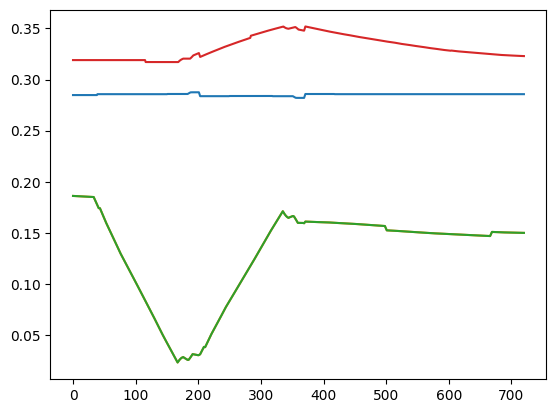

In [13]:
plt.plot(water_windows[1120])

In [14]:
# training dataset
X1_train = np.array([arr[:MAX_TOKENS] for arr in weather_windows[:857]])
X2_train = np.array([arr[:-1] for arr in water_windows[:857]])
Y_train = np.array([arr[1:] for arr in water_windows[:857]])

print(X1_train.shape)
print(X2_train.shape)
print(Y_train.shape)

# validation dataset
X1_val = np.array([arr[:MAX_TOKENS] for arr in weather_windows[857:1041]])
X2_val = np.array([arr[:-1] for arr in water_windows[857:1041]])
Y_val = np.array([arr[1:] for arr in water_windows[857:1041]])

print(X1_val.shape)
print(X2_val.shape)
print(Y_val.shape)

# testing dataset
X1_test = np.array([arr[:MAX_TOKENS] for arr in weather_windows[1041:]])
X2_test = np.array([arr[:-1] for arr in water_windows[1041:]])
Y_test = np.array([arr[1:] for arr in water_windows[1041:]])

print(X1_test.shape)
print(X2_test.shape)
print(Y_test.shape)

(857, 720, 4)
(857, 720, 4)
(857, 720, 4)
(184, 720, 4)
(184, 720, 4)
(184, 720, 4)
(184, 720, 4)
(184, 720, 4)
(184, 720, 4)


### Build the Model

In [15]:
# Positional Encoding
def positional_encoding(length, depth):
    depth = depth / 2
    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate(
        [np.sin(angle_rads), np.cos(angle_rads)],
        axis=-1) 

    return tf.cast(pos_encoding, dtype=tf.float32)


class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, d_model):
        super().__init__()
        self.d_model = d_model
        self.pos_encoding = positional_encoding(length=2048, depth=d_model)

    def call(self, x):
        length = tf.shape(x)[1]
        # This factor sets the relative scale of the positional encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

In [16]:
# Attention Layers

class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
        
class CrossAttention(BaseAttention):
    def call(self, x, context):
        attn_output, attn_scores = self.mha(
            query=x,
            key=context,
            value=context,
            return_attention_scores=True)

        # Cache the attention scores for plotting later.
        self.last_attn_scores = attn_scores

        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x
    
class GlobalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x
    
class CausalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x,
            use_causal_mask=True)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x

In [17]:
# Feed Forward Layer

class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='sigmoid'),
            tf.keras.layers.Dense(dff, activation='sigmoid'),
            tf.keras.layers.Dense(d_model, activation='sigmoid'),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x) 
        return x

In [18]:
# Encoder Layer

class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,*, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.self_attention = GlobalSelfAttention(
            num_heads=2,
            key_dim=d_model,
            dropout=dropout_rate)
        
        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.self_attention(x)
        x = self.ffn(x)
        return x
    
class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.d_model = d_model
        self.pos_embedding = PositionalEmbedding(d_model=d_model)
        self.enc_layer = EncoderLayer(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):
        # `x` is token-IDs shape: (batch, seq_len)
        x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.
        # Add dropout.
        x = self.dropout(x)
        x = self.enc_layer(x)
        return x  # Shape `(batch_size, seq_len, d_model)`.

In [19]:
# Decoder Layer

class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super(DecoderLayer, self).__init__()
        self.causal_self_attention = CausalSelfAttention(
            num_heads=2,
            key_dim=d_model,
            dropout=dropout_rate)
        
        self.cross_attention = CrossAttention(
            num_heads=2,
            key_dim=d_model,
            dropout=dropout_rate)
        
        self.ffn = FeedForward(d_model, dff)

    def call(self, x, context):
        x = self.causal_self_attention(x=x)
        x = self.cross_attention(x=x, context=context)
        self.last_attn_scores = self.cross_attention.last_attn_scores  # Cache the last attention scores for plotting later
        x = self.ffn(x)  
        return x
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.pos_embedding = PositionalEmbedding(d_model=d_model)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.dec_layer = DecoderLayer(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.last_attn_scores = None

    def call(self, x, context):
        x = self.pos_embedding(x)
        x = self.dropout(x)
        x = self.dec_layer(x, context)
        self.last_attn_scores = self.dec_layer.last_attn_scores

        return x

In [20]:
# Transformer Model

class Transformer(tf.keras.Model):
    def __init__(self, *, d_model, dff, target_output_size, dropout_rate=0.1):
        super().__init__()
        self.encoder = Encoder(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.decoder = Decoder(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.final_layer = tf.keras.layers.Dense(target_output_size, activation='sigmoid')

    def call(self, inputs):
        # To use a Keras model with `.fit` you must pass all your inputs in the
        # first argument.
        context, x  = inputs
        
        context = self.encoder(context)

        x = self.decoder(x, context)  # (batch_size, target_len, d_model)

        # Final linear layer output.
        logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

        try:
            # Drop the keras mask, so it doesn't scale the losses/metrics.
            # b/250038731
            del logits._keras_mask
        except AttributeError:
            pass

        # Return the final output and the attention weights.
        return logits

In [21]:
transformer = Transformer(d_model=4, dff=512, target_output_size=4)

output = transformer((X1_test, X2_test))
output.shape

TensorShape([184, 720, 4])

In [22]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  267440    
                                                                 
 decoder (Decoder)           multiple                  267604    
                                                                 
 dense_6 (Dense)             multiple                  20        
                                                                 
Total params: 535064 (2.04 MB)
Trainable params: 535064 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
import keras 

callback = keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=3)

transformer.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.MeanAbsoluteError()])

transformer.fit(x=(X1_train, X2_train), y=Y_train, batch_size=64, epochs=100, validation_data=((X1_val, X2_val), Y_val), callbacks=[callback])

Epoch 1/100
14/14 [==============================] - 102s 7s/step - loss: 0.0826 - mean_absolute_error: 0.2360 - val_loss: 0.0573 - val_mean_absolute_error: 0.1893
Epoch 2/100
14/14 [==============================] - 96s 7s/step - loss: 0.0585 - mean_absolute_error: 0.1955 - val_loss: 0.0350 - val_mean_absolute_error: 0.1525
Epoch 3/100
14/14 [==============================] - 96s 7s/step - loss: 0.0442 - mean_absolute_error: 0.1697 - val_loss: 0.0247 - val_mean_absolute_error: 0.1338
Epoch 4/100
14/14 [==============================] - 98s 7s/step - loss: 0.0369 - mean_absolute_error: 0.1547 - val_loss: 0.0205 - val_mean_absolute_error: 0.1238
Epoch 5/100
14/14 [==============================] - 97s 7s/step - loss: 0.0330 - mean_absolute_error: 0.1453 - val_loss: 0.0181 - val_mean_absolute_error: 0.1168
Epoch 6/100
14/14 [==============================] - 96s 7s/step - loss: 0.0306 - mean_absolute_error: 0.1388 - val_loss: 0.0166 - val_mean_absolute_error: 0.1115
Epoch 7/100
14/14 [==

KeyboardInterrupt: 

### Test the Model

In [ ]:
# measure accuracy
from sklearn.metrics import mean_absolute_error

pred = transformer.predict((X1_test, X2_test), verbose=None)
mean_absolute_error(y_true=np.reshape(Y_test, (-1, 4)), y_pred=np.reshape(pred, (-1, 4)))

0.07327579312805466

In [ ]:
def make_predictions(index):
    context = X1_test[index]
    target = X2_test[index][:1]
    print(context.shape)
    
    for i in range(MAX_TOKENS):
        y_pred = transformer.predict(x=(np.array([context]), np.array([target])), verbose=None)
        target = np.vstack((target, np.array([y_pred[0][-1]])))
    
    print(target.shape)
    plt.plot(target[1:])
    plt.plot(Y_test[index])
    

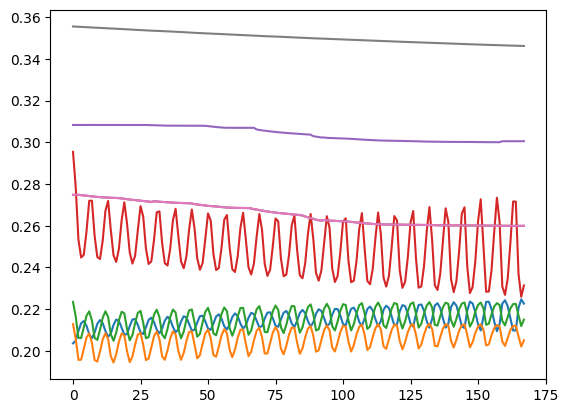

In [ ]:
make_predictions(32)

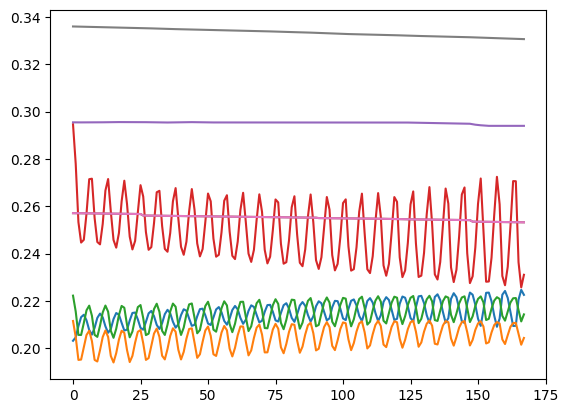

In [ ]:
make_predictions(64)

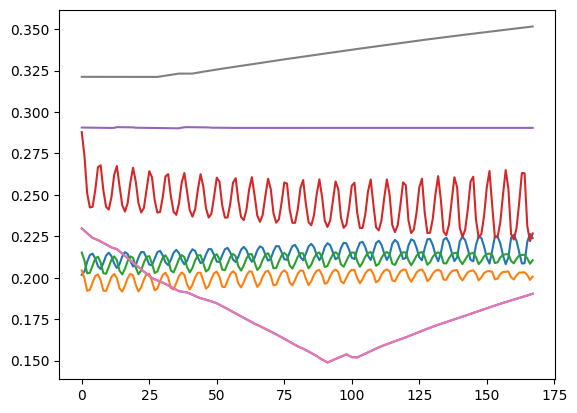

In [ ]:
make_predictions(128)